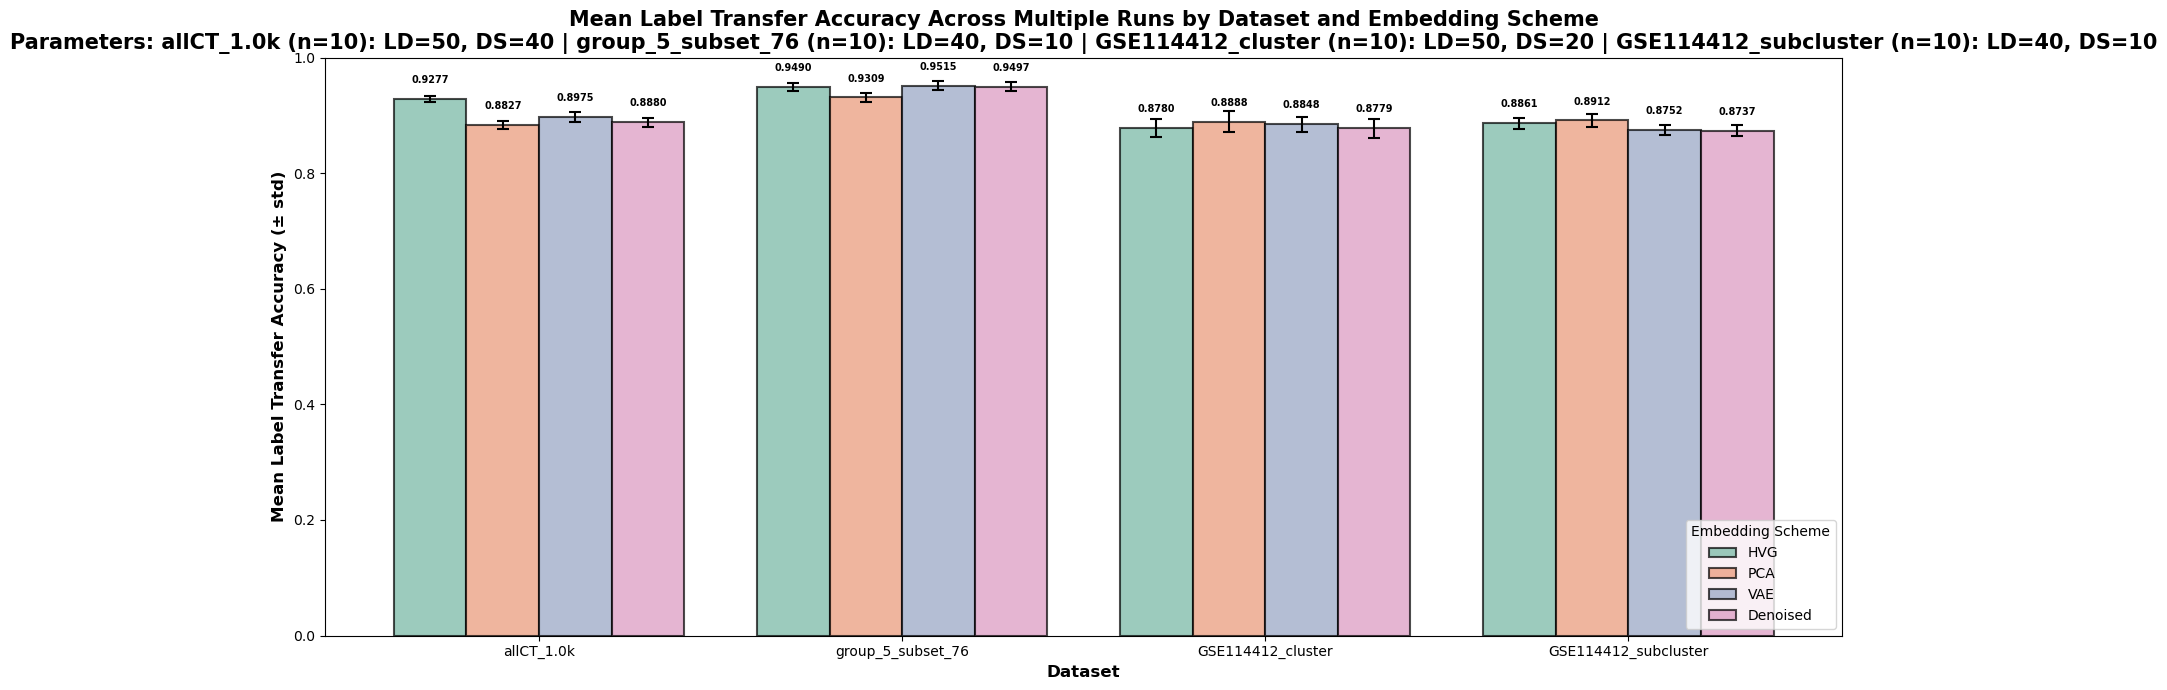


Dataset 1: allCT_1.0k (n=10 runs)
HVG       : 0.9277 ± 0.0050 (min: 0.9170, max: 0.9333)
PCA       : 0.8827 ± 0.0067 (min: 0.8732, max: 0.8940)
VAE       : 0.8975 ± 0.0089 (min: 0.8832, max: 0.9099)
DENOISED  : 0.8880 ± 0.0074 (min: 0.8736, max: 0.8958)

Dataset 2: group_5_subset_76 (n=10 runs)
HVG       : 0.9490 ± 0.0069 (min: 0.9379, max: 0.9588)
PCA       : 0.9309 ± 0.0084 (min: 0.9120, max: 0.9419)
VAE       : 0.9515 ± 0.0073 (min: 0.9395, max: 0.9645)
DENOISED  : 0.9497 ± 0.0078 (min: 0.9354, max: 0.9613)

Dataset 3: GSE114412_cluster (n=10 runs)
HVG       : 0.8780 ± 0.0151 (min: 0.8556, max: 0.9069)
PCA       : 0.8888 ± 0.0181 (min: 0.8623, max: 0.9231)
VAE       : 0.8848 ± 0.0128 (min: 0.8677, max: 0.9028)
DENOISED  : 0.8779 ± 0.0164 (min: 0.8570, max: 0.9055)

Dataset 4: GSE114412_subcluster (n=10 runs)
HVG       : 0.8861 ± 0.0096 (min: 0.8694, max: 0.9005)
PCA       : 0.8912 ± 0.0105 (min: 0.8710, max: 0.9005)
VAE       : 0.8752 ± 0.0090 (min: 0.8583, max: 0.8854)
DENOISED  :

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read all four CSV files
df1 = pd.read_csv('/novo/users/iwaq/multi/project_allCT_1.0k/results/multiple_run_allCT_1.0k_nruns_10.csv')
df2 = pd.read_csv('/novo/users/iwaq/multi/project_GSE114412_cluster/results/multiple_run_GSE114412_cluster_nruns_10.csv')
df3 = pd.read_csv('/novo/users/iwaq/multi/project_group_5_subset_76_ncells_7/results/multiple_run_group_5_subset_76_ncells_7_nruns_10.csv')
df4 = pd.read_csv('/novo/users/iwaq/multi/project_GSE114412_subcluster/results/multiple_run_GSE114412_subcluster_nruns_10.csv')

# Calculate mean and std for label transfer accuracy scores
def get_stats(df):
    return {
        'PCA': {'mean': df['lt_pca_test_acc'].mean(), 'std': df['lt_pca_test_acc'].std()},
        'VAE': {'mean': df['lt_vae_test_acc'].mean(), 'std': df['lt_vae_test_acc'].std()},
        'Denoised': {'mean': df['lt_denoised_test_acc'].mean(), 'std': df['lt_denoised_test_acc'].std()},
        'HVG': {'mean': df['lt_hvg_test_acc'].mean(), 'std': df['lt_hvg_test_acc'].std()}
    }

stats_df1 = get_stats(df1)
stats_df2 = get_stats(df2)
stats_df3 = get_stats(df3)
stats_df4 = get_stats(df4)

# Create a dataframe for plotting
plot_data = []
for dataset_name, stats_dict in [('allCT_1.0k', stats_df1),
                                  ('GSE114412_cluster', stats_df2),
                                  ('group_5_subset_76', stats_df3),
                                  ('GSE114412_subcluster', stats_df4)]:
    for embedding in ['HVG', 'PCA', 'VAE', 'Denoised']:
        plot_data.append({
            'Dataset': dataset_name,
            'Mean Accuracy': stats_dict[embedding]['mean'],
            'Std Accuracy': stats_dict[embedding]['std'],
            'Embedding': embedding
        })

plot_df = pd.DataFrame(plot_data)

# Create the bar plot with error bars
plt.figure(figsize=(16, 7))

# CHANGED: Reordered datasets to put GSE cluster and subcluster at the end
datasets = ['allCT_1.0k', 'group_5_subset_76', 'GSE114412_cluster', 'GSE114412_subcluster']

# Use seaborn with errorbar parameter
ax = sns.barplot(data=plot_df, x='Dataset', y='Mean Accuracy', hue='Embedding',
                 palette='Set2',
                 order=datasets,  # CHANGED: Using the new order
                 hue_order=['HVG', 'PCA', 'VAE', 'Denoised'],
                 edgecolor='black', linewidth=1.5, alpha=0.7)

# Add error bars manually using the dataframe
embeddings = ['HVG', 'PCA', 'VAE', 'Denoised']
n_datasets = len(datasets)
n_embeddings = len(embeddings)

# Calculate bar positions
bar_width = 0.8 / n_embeddings
x_positions = np.arange(n_datasets)

for i, embedding in enumerate(embeddings):
    for j, dataset in enumerate(datasets):
        # Get mean and std for this combination
        row = plot_df[(plot_df['Dataset'] == dataset) & (plot_df['Embedding'] == embedding)]
        mean_val = row['Mean Accuracy'].values[0]
        std_val = row['Std Accuracy'].values[0]
        
        # Calculate x position for this bar
        x_pos = x_positions[j] + (i - n_embeddings/2 + 0.5) * bar_width
        
        # Add error bar
        ax.errorbar(x_pos, mean_val, yerr=std_val,
                   fmt='none', color='black',
                   capsize=4, capthick=1.5, linewidth=1.5, zorder=10)

# Add value labels on top of bars
for i, container in enumerate(ax.containers):
    if i < len(embeddings):  # Only process the actual bar containers
        ax.bar_label(container, fmt='%.4f', padding=10, fontsize=7, fontweight='bold')

# Customize the plot
plt.xlabel('Dataset', fontsize=12, fontweight='bold')
plt.ylabel('Mean Label Transfer Accuracy (± std)', fontsize=12, fontweight='bold')
plt.ylim(0, min(1.0, (plot_df['Mean Accuracy'] + plot_df['Std Accuracy']).max() * 1.15))

# Get parameters (using first row since all rows have same parameters)
best_row_df1 = df1.iloc[0]
best_row_df2 = df2.iloc[0]
best_row_df3 = df3.iloc[0]
best_row_df4 = df4.iloc[0]

# Get number of runs
n_runs_df1 = len(df1)
n_runs_df2 = len(df2)
n_runs_df3 = len(df3)
n_runs_df4 = len(df4)

# Create multi-line title - CHANGED order to match new dataset order
plt.title(f'Mean Label Transfer Accuracy Across Multiple Runs by Dataset and Embedding Scheme\n' +
          f'Parameters: ' +
          f'allCT_1.0k (n={n_runs_df1}): LD={int(best_row_df1["latent_dim"])}, DS={int(best_row_df1["denoise_steps"])} | ' +
          f'group_5_subset_76 (n={n_runs_df3}): LD={int(best_row_df3["latent_dim"])}, DS={int(best_row_df3["denoise_steps"])} | ' +
          f'GSE114412_cluster (n={n_runs_df2}): LD={int(best_row_df2["latent_dim"])}, DS={int(best_row_df2["denoise_steps"])} | ' +
          f'GSE114412_subcluster (n={n_runs_df4}): LD={int(best_row_df4["latent_dim"])}, DS={int(best_row_df4["denoise_steps"])}',
          fontsize=15, fontweight='bold')

plt.legend(title='Embedding Scheme', fontsize=10, loc='lower right')
plt.tight_layout()
plt.savefig('/novo/users/iwaq/figures/label_transfer_accuracy_comparison_multiple_runs_with_errorbar.png', bbox_inches='tight', dpi=300)
plt.show()

# Print summary statistics for all four datasets - CHANGED order
for df_num, (df, name) in enumerate([(df1, 'allCT_1.0k'),
                                       (df3, 'group_5_subset_76'),
                                       (df2, 'GSE114412_cluster'),
                                       (df4, 'GSE114412_subcluster')], 1):
    print(f"\n{'='*60}")
    print(f"Dataset {df_num}: {name} (n={len(df)} runs)")
    print(f"{'='*60}")
    for col in ['lt_hvg_test_acc', 'lt_pca_test_acc', 'lt_vae_test_acc', 'lt_denoised_test_acc']:
        method = col.replace('lt_', '').replace('_test_acc', '').upper()
        mean_val = df[col].mean()
        std_val = df[col].std()
        min_val = df[col].min()
        max_val = df[col].max()
        print(f"{method:10s}: {mean_val:.4f} ± {std_val:.4f} (min: {min_val:.4f}, max: {max_val:.4f})")

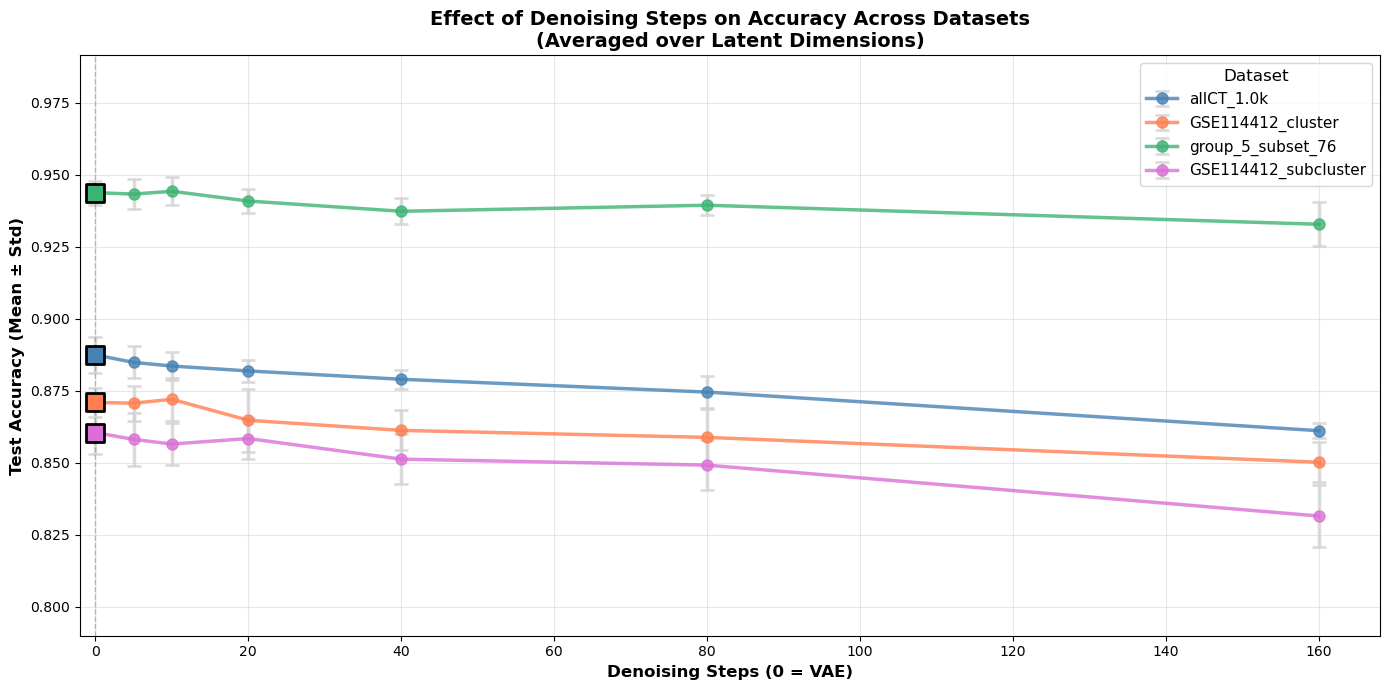


Summary Statistics:

allCT_1.0k:
  VAE (0 steps): 0.8875 ± 0.0063
  Denoised (5 steps): 0.8849 ± 0.0056
  Denoised (10 steps): 0.8836 ± 0.0049
  Denoised (20 steps): 0.8819 ± 0.0039
  Denoised (40 steps): 0.8790 ± 0.0033
  Denoised (80 steps): 0.8746 ± 0.0056
  Denoised (160 steps): 0.8612 ± 0.0026
  Best: 0 steps with 0.8875 accuracy

GSE114412_cluster:
  VAE (0 steps): 0.8710 ± 0.0050
  Denoised (5 steps): 0.8707 ± 0.0061
  Denoised (10 steps): 0.8721 ± 0.0075
  Denoised (20 steps): 0.8648 ± 0.0109
  Denoised (40 steps): 0.8613 ± 0.0069
  Denoised (80 steps): 0.8588 ± 0.0099
  Denoised (160 steps): 0.8502 ± 0.0069
  Best: 10 steps with 0.8721 accuracy

group_5_subset_76:
  VAE (0 steps): 0.9438 ± 0.0042
  Denoised (5 steps): 0.9433 ± 0.0051
  Denoised (10 steps): 0.9443 ± 0.0048
  Denoised (20 steps): 0.9409 ± 0.0041
  Denoised (40 steps): 0.9374 ± 0.0046
  Denoised (80 steps): 0.9395 ± 0.0036
  Denoised (160 steps): 0.9328 ± 0.0076
  Best: 10 steps with 0.9443 accuracy

GSE114412_s

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read data
df1 = pd.read_csv('/novo/users/iwaq/multi/project_allCT_1.0k/results/grid_search_results_allCT_1.0k_final.csv')
df2 = pd.read_csv('/novo/users/iwaq/multi/project_GSE114412_cluster/results/grid_search_results_GSE114412_cluster_final.csv')
df3 = pd.read_csv('/novo/users/iwaq/multi/project_group_5_subset_76_ncells_7/results/grid_search_results_group_5_subset_76_ncells_7_final.csv')
df4 = pd.read_csv('/novo/users/iwaq/multi/project_GSE114412_subcluster/results/grid_search_results_GSE114412_subcluster_final.csv')

# Function to get denoising effect data
def get_denoising_data(df):
    # Get VAE data (denoise_steps == 0)
    df_vae = df[df['denoise_steps'] == 0].copy()
    vae_mean_acc = df_vae['lt_vae_test_acc'].mean()
    vae_std_acc = df_vae['lt_vae_test_acc'].std()
    
    # Get denoised data (denoise_steps > 0)
    df_denoised = df[df['denoise_steps'] > 0].copy()
    by_steps = df_denoised.groupby('denoise_steps').agg({
        'lt_denoised_test_acc': ['mean', 'std']
    })
    
    denoise_steps = sorted(df_denoised['denoise_steps'].unique())
    denoise_steps_with_zero = [0] + denoise_steps
    means_acc = by_steps[('lt_denoised_test_acc', 'mean')].values
    stds_acc = by_steps[('lt_denoised_test_acc', 'std')].values
    
    means_acc_with_zero = np.concatenate([[vae_mean_acc], means_acc])
    stds_acc_with_zero = np.concatenate([[vae_std_acc], stds_acc])
    
    return {
        'steps': denoise_steps_with_zero,
        'means': means_acc_with_zero,
        'stds': stds_acc_with_zero
    }

# Get data for all four datasets
data1 = get_denoising_data(df1)
data2 = get_denoising_data(df2)
data3 = get_denoising_data(df3)
data4 = get_denoising_data(df4)

# Create the plot
fig, ax = plt.subplots(figsize=(14, 7))

datasets = [
    (data1, 'allCT_1.0k', 'steelblue'),
    (data2, 'GSE114412_cluster', 'coral'),
    (data3, 'group_5_subset_76', 'mediumseagreen'),
    (data4, 'GSE114412_subcluster', 'orchid')
]

# Calculate global y-axis limits
all_values = []
for data, _, _ in datasets:
    all_values.extend(data['means'])
y_min = min(all_values) * 0.95
y_max = max(all_values) * 1.05

# Plot each dataset
for data, dataset_name, color in datasets:
    ax.errorbar(data['steps'], data['means'], yerr=data['stds'],
                marker='o', linewidth=2.5, markersize=8,
                capsize=5, capthick=2, color=color,
                ecolor='lightgray', alpha=0.8,
                label=dataset_name)
    
    ax.scatter([0], [data['means'][0]], s=150, color=color, marker='s',
               zorder=5, edgecolors='black', linewidths=2)

# Customize the plot
ax.set_xlabel('Denoising Steps (0 = VAE)', fontsize=12, fontweight='bold')
ax.set_ylabel('Test Accuracy (Mean ± Std)', fontsize=12, fontweight='bold')
ax.set_title('Effect of Denoising Steps on Accuracy Across Datasets\n(Averaged over Latent Dimensions)',
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(title='Dataset', fontsize=11, loc='best', title_fontsize=12)
ax.set_xlim(left=-2)
ax.set_ylim(y_min, y_max)
ax.axvline(x=0, color='gray', linestyle='--', alpha=0.5, linewidth=1)

plt.tight_layout()
plt.savefig('/novo/users/iwaq/figures/denoising_steps_effect.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print("="*70)
for data, dataset_name, _ in datasets:
    print(f"\n{dataset_name}:")
    print(f"  VAE (0 steps): {data['means'][0]:.4f} ± {data['stds'][0]:.4f}")
    for i, step in enumerate(data['steps'][1:], 1):
        print(f"  Denoised ({int(step)} steps): {data['means'][i]:.4f} ± {data['stds'][i]:.4f}")
    best_idx = np.argmax(data['means'])
    print(f"  Best: {data['steps'][best_idx]} steps with {data['means'][best_idx]:.4f} accuracy")

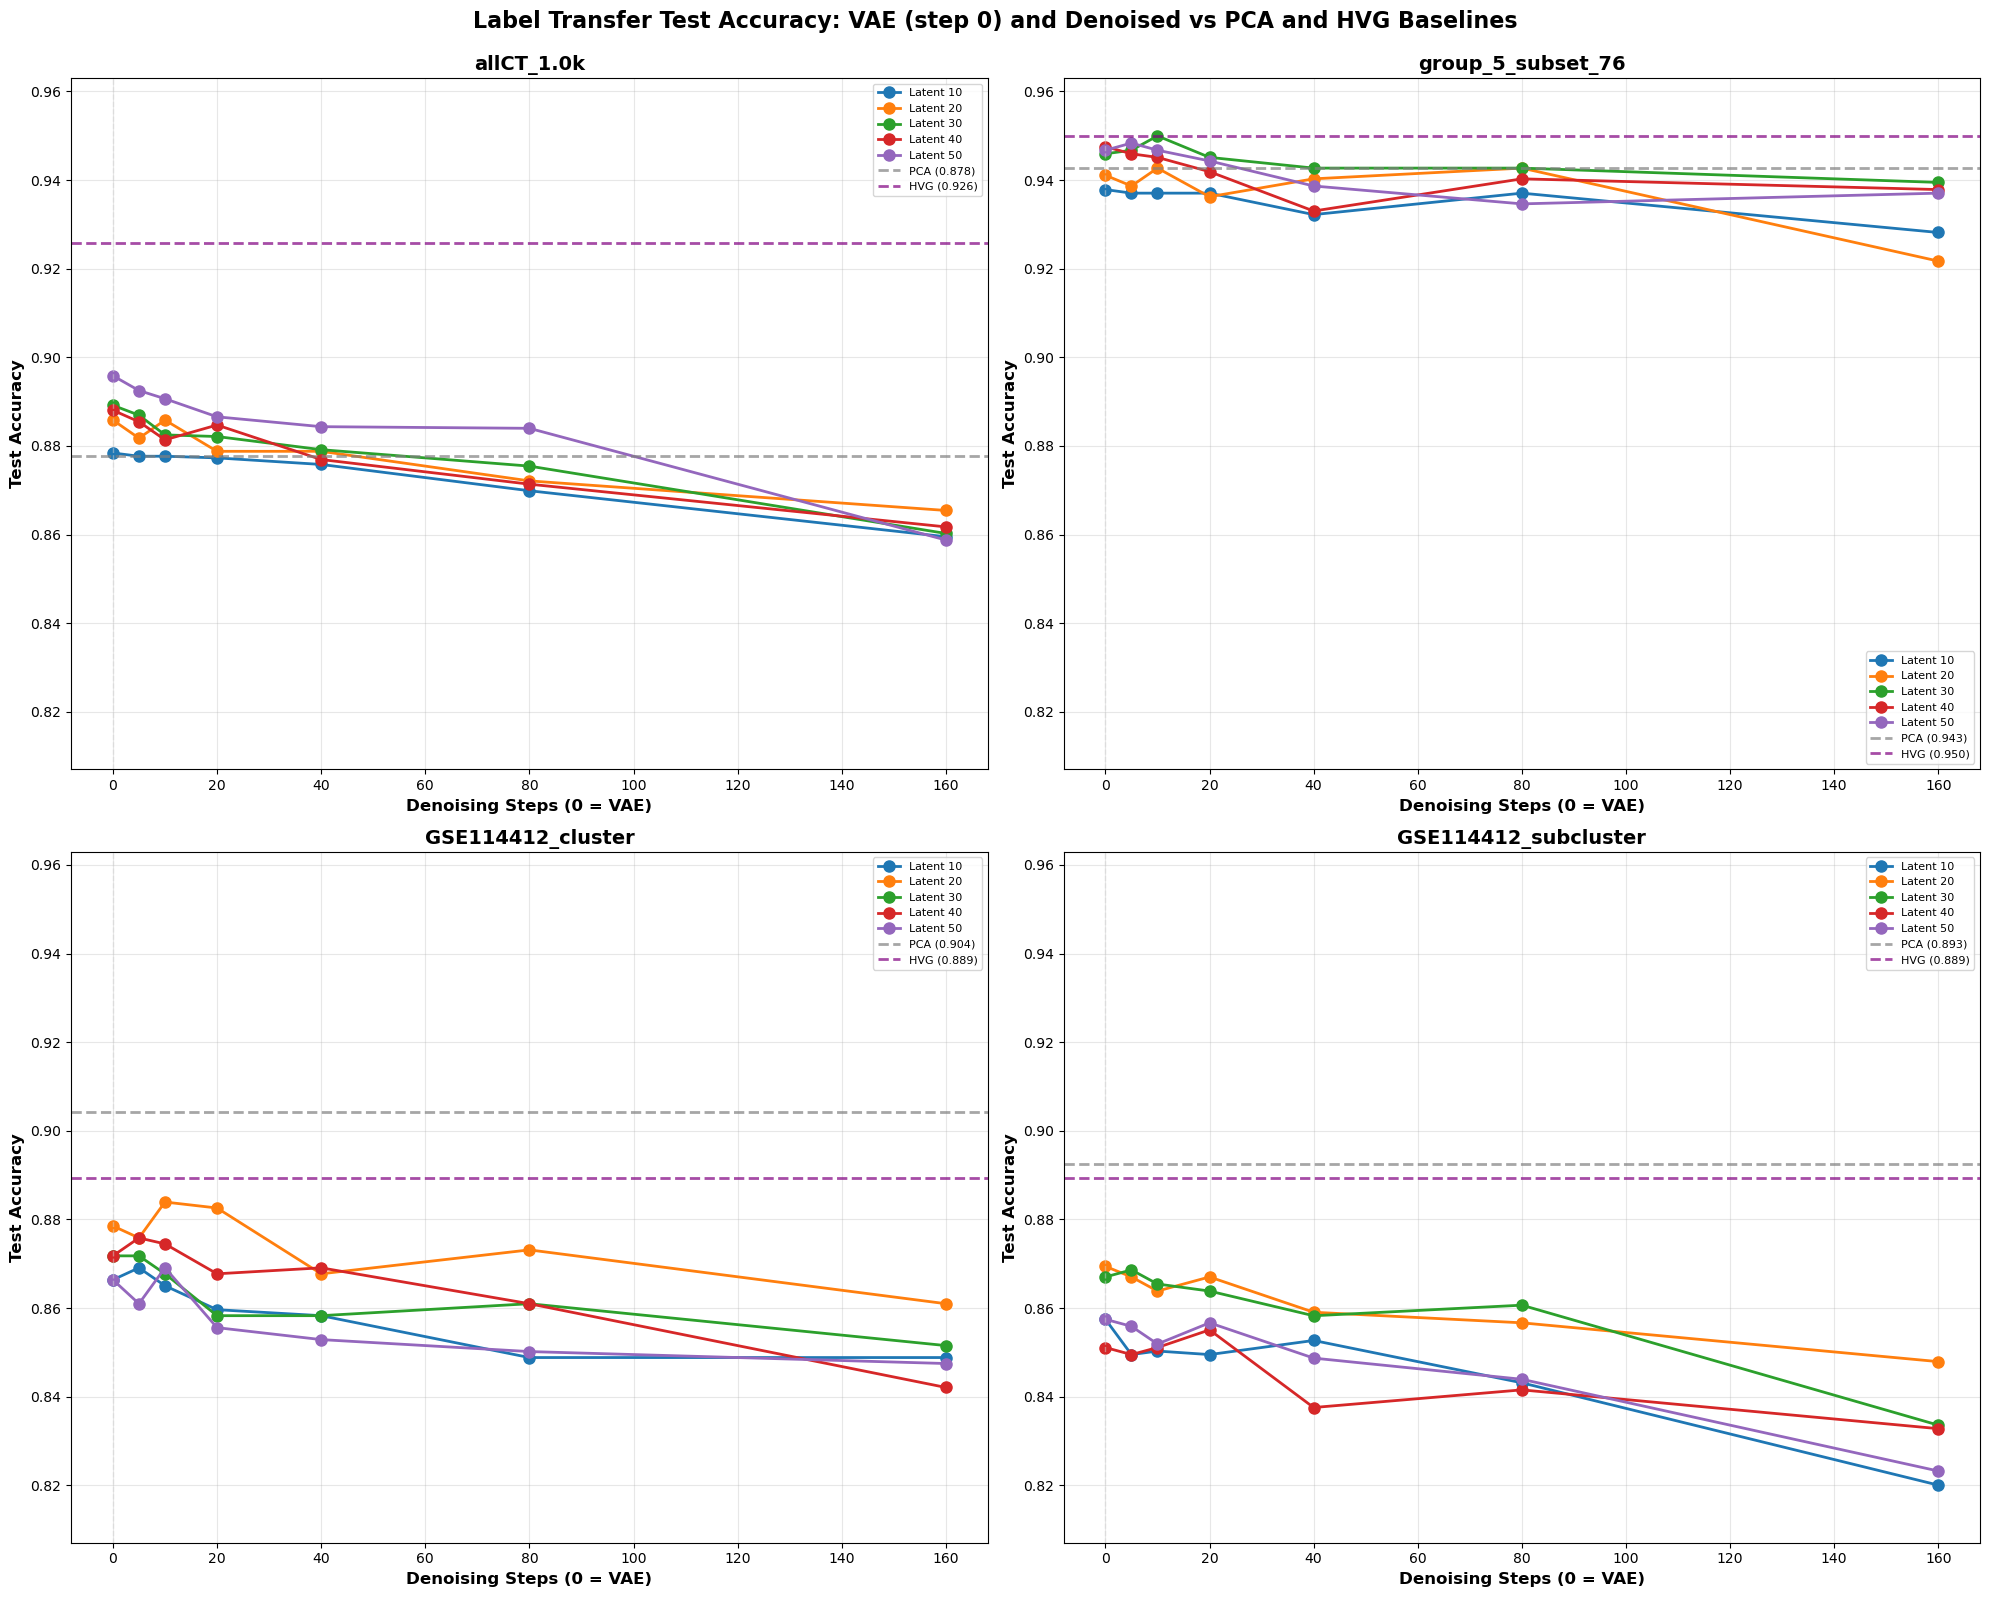


Summary Statistics:

allCT_1.0k:
  HVG: 0.9259
  PCA: 0.8777
  Best VAE: 0.8958 (LD=50)
  Best Denoised: 0.8925 (LD=50, DS=5)

group_5_subset_76:
  HVG: 0.9500
  PCA: 0.9427
  Best VAE: 0.9475 (LD=40)
  Best Denoised: 0.9500 (LD=30, DS=10)

GSE114412_cluster:
  HVG: 0.8893
  PCA: 0.9042
  Best VAE: 0.8785 (LD=20)
  Best Denoised: 0.8839 (LD=20, DS=10)

GSE114412_subcluster:
  HVG: 0.8893
  PCA: 0.8925
  Best VAE: 0.8694 (LD=20)
  Best Denoised: 0.8686 (LD=30, DS=5)


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read data
df1 = pd.read_csv('/novo/users/iwaq/multi/project_allCT_1.0k/results/grid_search_results_allCT_1.0k_final.csv')
df2 = pd.read_csv('/novo/users/iwaq/multi/project_GSE114412_cluster/results/grid_search_results_GSE114412_cluster_final.csv')
df3 = pd.read_csv('/novo/users/iwaq/multi/project_group_5_subset_76_ncells_7/results/grid_search_results_group_5_subset_76_ncells_7_final.csv')
df4 = pd.read_csv('/novo/users/iwaq/multi/project_GSE114412_subcluster/results/grid_search_results_GSE114412_subcluster_final.csv')

# Create four side-by-side plots
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
axes = axes.flatten()

# CHANGED: Reordered datasets so GSE datasets are in bottom row (positions 2 and 3)
datasets = [
    (df1, 'allCT_1.0k', axes[0]),                      # Top-left
    (df3, 'group_5_subset_76', axes[1]),               # Top-right
    (df2, 'GSE114412_cluster', axes[2]),               # Bottom-left
    (df4, 'GSE114412_subcluster', axes[3])             # Bottom-right
]

# Calculate global y-axis limits
all_values = []
for df, _, _ in datasets:
    all_values.extend(df['lt_vae_test_acc'].dropna().tolist())
    all_values.extend(df['lt_denoised_test_acc'].dropna().tolist())

y_min = min(all_values)
y_max = max(all_values)
y_padding = (y_max - y_min) * 0.1

for df, dataset_name, ax in datasets:
    # Get baseline scores
    best_hvg = df['lt_hvg_test_acc'].max()
    best_pca = df['lt_pca_test_acc'].max()
    
    # Plot line for each latent dimension
    for latent_dim in sorted(df['latent_dim'].unique()):
        df_ld = df[df['latent_dim'] == latent_dim]
        
        # Get VAE score (denoise_steps == 0)
        vae_subset = df_ld[df_ld['denoise_steps'] == 0]
        if len(vae_subset) == 0:
            continue
        vae_score = vae_subset['lt_vae_test_acc'].iloc[0]
        
        # Get denoised scores
        denoised_subset = df_ld[df_ld['denoise_steps'] > 0].sort_values('denoise_steps')
        if len(denoised_subset) == 0:
            continue
        
        # Create extended data including VAE at step 0
        denoise_steps_extended = [0] + denoised_subset['denoise_steps'].tolist()
        scores_extended = [vae_score] + denoised_subset['lt_denoised_test_acc'].tolist()
        
        # Plot the line
        ax.plot(denoise_steps_extended, scores_extended,
                marker='o', linewidth=2, markersize=8,
                label=f'Latent {int(latent_dim)}')
    
    # Add horizontal reference lines
    ax.axhline(y=best_pca, color='gray', linestyle='--', linewidth=2,
               label=f'PCA ({best_pca:.3f})', alpha=0.7)
    ax.axhline(y=best_hvg, color='purple', linestyle='--', linewidth=2,
               label=f'HVG ({best_hvg:.3f})', alpha=0.7)
    
    # Add vertical line at x=0
    ax.axvline(x=0, color='lightgray', linestyle='--', alpha=0.5, linewidth=1)
    
    ax.set_xlabel('Denoising Steps (0 = VAE)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Test Accuracy', fontsize=12, fontweight='bold')
    ax.set_title(f'{dataset_name}', fontsize=14, fontweight='bold')
    ax.legend(fontsize=8, loc='best')
    ax.grid(True, alpha=0.3)
    ax.set_ylim(y_min - y_padding, y_max + y_padding)

fig.suptitle('Label Transfer Test Accuracy: VAE (step 0) and Denoised vs PCA and HVG Baselines',
             fontsize=16, fontweight='bold', y=0.995)

plt.tight_layout()
plt.savefig('/novo/users/iwaq/figures/label_transfer_lineplot_comparison_four_datasets.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary
print("\nSummary Statistics:")
print("="*80)
for df, dataset_name, _ in datasets:
    print(f"\n{dataset_name}:")
    print(f"  HVG: {df['lt_hvg_test_acc'].max():.4f}")
    print(f"  PCA: {df['lt_pca_test_acc'].max():.4f}")
    
    # Best VAE
    df_vae = df[df['denoise_steps'] == 0]
    best_vae_idx = df_vae['lt_vae_test_acc'].idxmax()
    best_vae = df_vae.loc[best_vae_idx]
    print(f"  Best VAE: {best_vae['lt_vae_test_acc']:.4f} (LD={int(best_vae['latent_dim'])})")
    
    # Best Denoised
    df_denoised = df[df['denoise_steps'] > 0]
    best_denoised_idx = df_denoised['lt_denoised_test_acc'].idxmax()
    best_denoised = df_denoised.loc[best_denoised_idx]
    print(f"  Best Denoised: {best_denoised['lt_denoised_test_acc']:.4f} (LD={int(best_denoised['latent_dim'])}, DS={int(best_denoised['denoise_steps'])})")